In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# which outbreaks were the most severe?
# which outbreaks caused the most number of people to be ill?
# which outbreaks caused the most number of hospitalizations?
# which outbreaks caused a disproportionate number of hospitalizations per illness? fatalities?

In [4]:
df = pd.read_csv('outbreaks.csv')

In [5]:
df = df[df['Food'].notnull()][df['Species'].notnull()]

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",NaN,Salmonella enterica,Enteritidis,Confirmed,4,3.0,0.0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",NaN,Virus,NaN,Suspected,21,NaN,NaN
9,1998,January,Colorado,Restaurant,"Peppers, Chili",NaN,Virus,NaN,Suspected,3,NaN,0.0


In [7]:
food_set = df['Food'].str.lower().str.replace(',','').str.replace(';','').str.split()
food_set.head()

3                                  [fish, ahi]
4          [lasagna, unspecified, eggs, other]
7    [stuffing, unspecified, sandwich, turkey]
8                         [salad, unspecified]
9                             [peppers, chili]
Name: Food, dtype: object

In [8]:
species_set = df['Species'].str.lower().str.replace(';',',').str.split(',').map(lambda x:[i.strip() for i in x])
species_set.head()

3        [scombroid toxin]
4    [salmonella enterica]
7    [salmonella enterica]
8                  [virus]
9                  [virus]
Name: Species, dtype: object

In [9]:
df['clean food'] = food_set

In [10]:
df['clean species'] = species_set

In [11]:
# one challenge with this data was that some, but not most, of the outbreaks had multiple species
# reported, but these reports were inconsistent. Some of the secondary species were subtypes of the
# first species listed, and some secondary species were separate organisms altogether, which could be a 
# sign of inaccurate data due to the fact that polymicrobial infections are relatively uncommon; more likely, one
# or more of the species reported in polymicrobial infections were misreported contaminants

In [12]:
# the following block of code shows that 672 outbreaks out 7245 had multiple species report, and the 
# majority of those were subtypes rather than secondary organisms

In [13]:
df[df['clean species'].apply(len)>1]['clean species']

137      [clostridium perfringens, staphylococcus aureus]
370                    [shigella boydii, shigella sonnei]
469             [escherichia coli, shiga toxin-producing]
474                  [escherichia coli, enteropathogenic]
506             [escherichia coli, shiga toxin-producing]
                               ...                       
18983     [norovirus genogroup i, norovirus genogroup ii]
19012           [escherichia coli, shiga toxin-producing]
19038            [bacillus cereus, staphylococcus aureus]
19080           [escherichia coli, shiga toxin-producing]
19095            [bacillus cereus, staphylococcus aureus]
Name: clean species, Length: 672, dtype: object

In [14]:
# adding a column to df that takes the first species from reported list

In [15]:
df['primary species'] = df['clean species'].apply(lambda x: x[0])

In [16]:
# using the primary species to one-hot encode the outbreaks, which turns out to be unncessary, and 
# further down in the notebook you will see groupby accomplish the same task with less code and computation

In [17]:
pd.get_dummies(df['primary species']).head(2)

,amnesic shellfish poison,anisakis,bacillus cereus,bacillus other,bacillus unknown,bacterium,brucella unknown,campylobacter,campylobacter coli,campylobacter jejuni,...,trichinella spiralis,trichinella unknown,unknown,vibrio cholerae,vibrio other,vibrio parahaemolyticus,vibrio unknown,vibrio vulnificus,virus,yersinia enterocolitica
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df['Illnesses'].values.reshape(-1,1)

array([[ 4],
       [26],
       [ 4],
       ...,
       [10],
       [29],
       [16]])

In [19]:
illness_counts_dummies = pd.get_dummies(df['primary species']) * df['Illnesses'].values.reshape(-1,1)

In [20]:
df_illnesses = pd.merge(df, illness_counts_dummies, left_index=True, right_index=True)

In [21]:
# df.groupby('primary species').sum().iloc[:40,:]

In [22]:
# df.groupby('primary species').sum().iloc[40:,:]

In [23]:
illnesses = df.groupby('primary species').sum()['Illnesses']
top_illnesses = illnesses.sort_values(ascending=False)

In [24]:
# top_illnesses[:10]

In [25]:
hospitalizations = df.groupby('primary species').sum()['Hospitalizations']
top_hospitalizations = hospitalizations.sort_values(ascending=False)

In [26]:
# top_hospitalizations[:10]

In [27]:
fatalities = df.groupby('primary species').sum()['Fatalities']
top_fatalities = fatalities.sort_values(ascending=False)

In [28]:
# top_fatalities[:10]

In [ ]:
# Make fake dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,5,8,9]
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

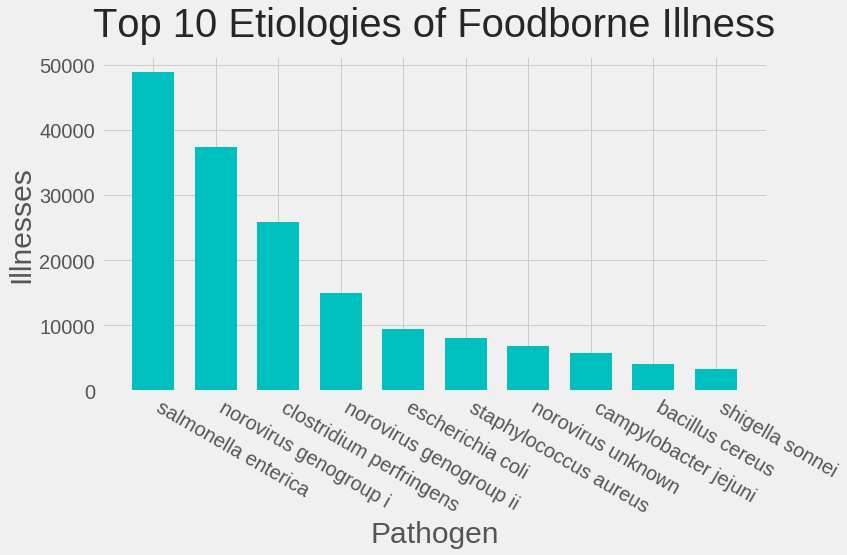

In [122]:
top = top_illnesses
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
n = 10
strings = ['Pathogen', 'Illnesses', 'Top 10 Etiologies of Foodborne Illness']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.9) 

plt.savefig('figures/etiologies');

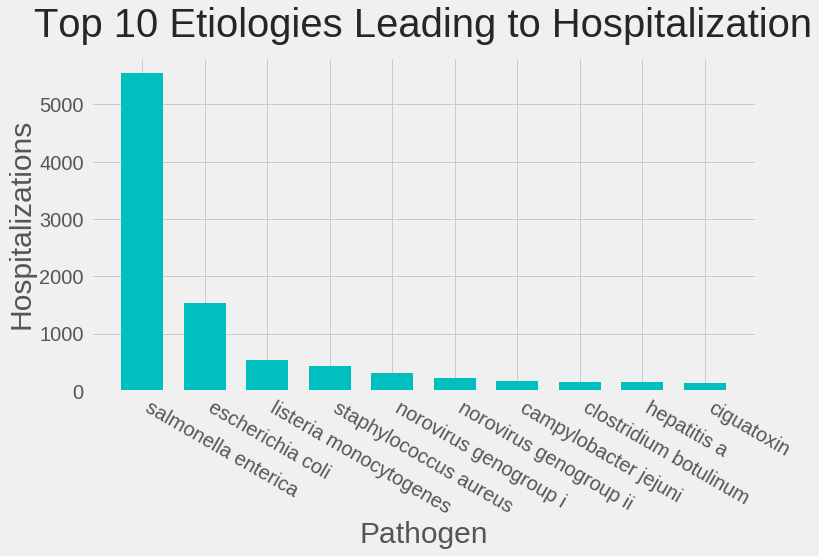

In [123]:
top = top_hospitalizations
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
n = 10
strings = ['Pathogen', 'Hospitalizations', 'Top 10 Etiologies Leading to Hospitalization']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.9) 

plt.savefig('figures/hospitalizations');

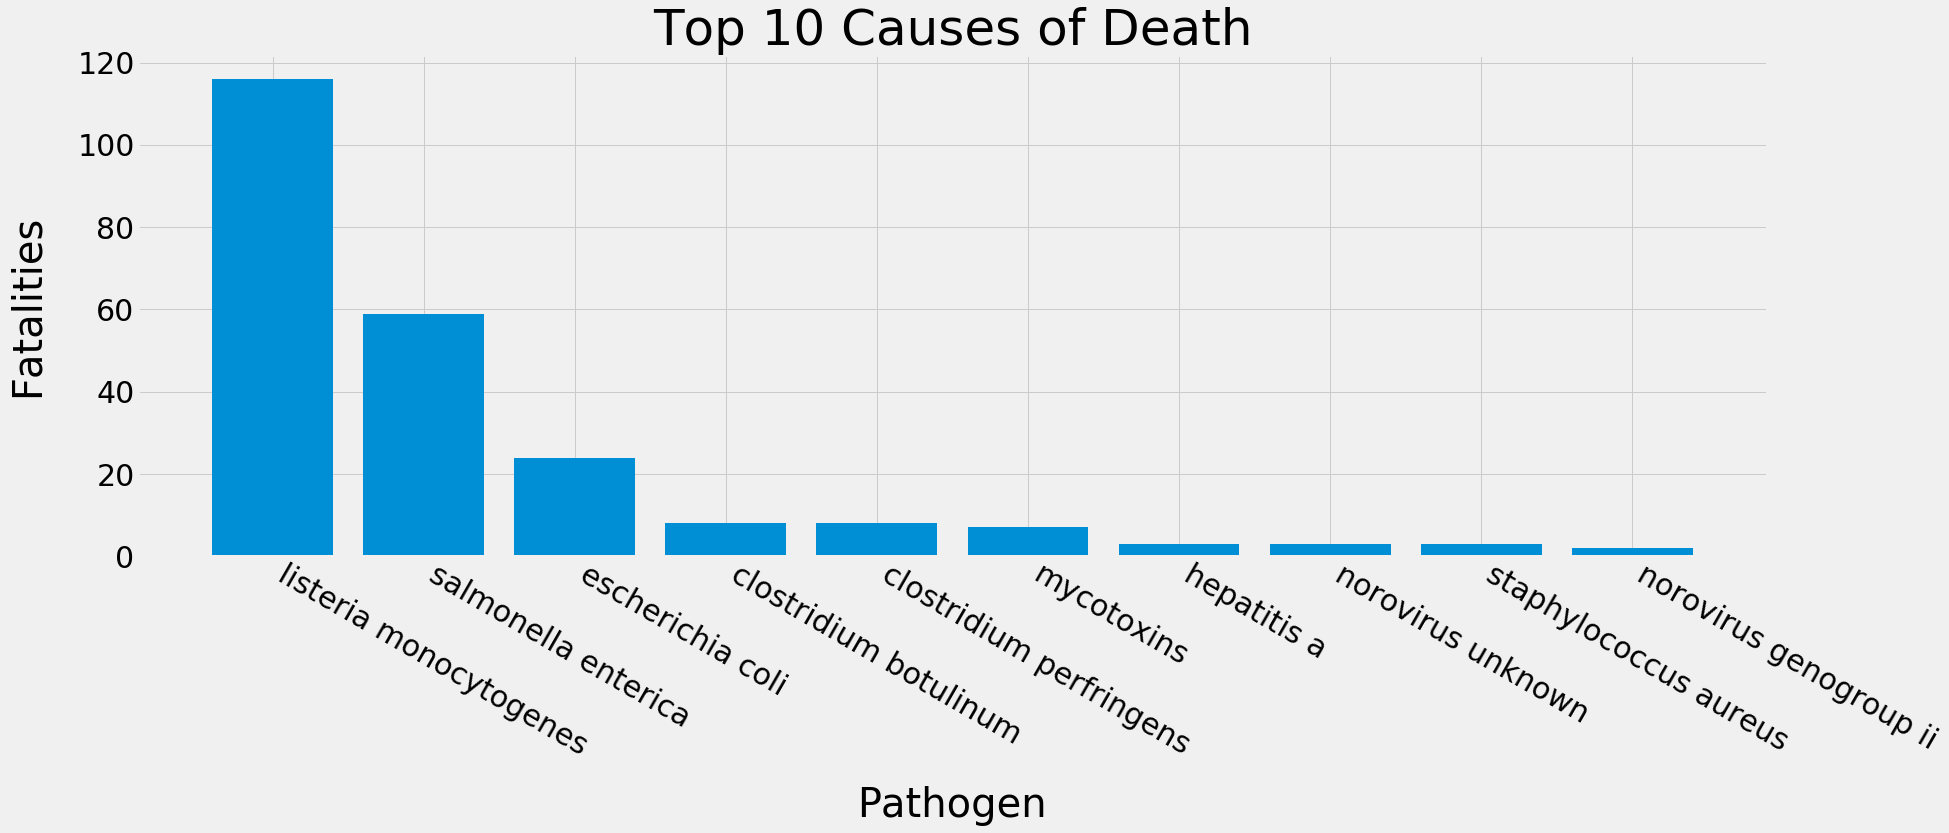

In [31]:
top = top_fatalities

fig,ax = plt.subplots(figsize=(26,12))

ax.bar(top[:10].index,top[:10])
ax.set_xlabel('Pathogen', labelpad = 25, fontsize=40)
ax.set_ylabel('Fatalities', fontsize=40, labelpad = 30)
ax.set_title('Top 10 Causes of Death', fontsize=50)

plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.gcf().subplots_adjust(bottom=0.30)
plt.tight_layout
plt.savefig('figures/fatalities');

In [32]:
# fig,axs = plt.subplots(3,1, figsize=(20,20))

# axs[0].bar(top_illnesses[:10].index,top_illnesses[:10])
# axs[0].set_title('Cases', fontsize=35)

# axs[1].bar(top_hospitalizations[:10].index,top_hospitalizations[:10])
# axs[1].set_title('Hospitalizations', fontsize=35)

# axs[2].bar(top_fatalities[:10].index,top_fatalities[:10])
# axs[2].set_title('Fatalities', fontsize=35)

# axs[0].set_xticklabels(labels=top_illnesses[:10].index, rotation=-45)
# axs[1].set_xticklabels(labels=top_hospitalizations[:10].index, rotation=-45)
# axs[2].set_xticklabels(labels=top_fatalities[:10].index, rotation=-45)

# plt.setp(ax.xaxis.get_majorticklabels(), ha='left')

# plt.rc('xtick', labelsize=18) 
# plt.suptitle('Top 10 Etiologies of Foodborne Illnesses', size=40, verticalalignment='bottom')
# plt.subplots_adjust(hspace=0.7)
# plt.style.use('fivethirtyeight')
# plt.savefig('figures/etiologies');

In [33]:
hospitalizations_per_illness = hospitalizations / illnesses
top_hospitalizations_per_illness = hospitalizations_per_illness.sort_values(ascending=False)

In [34]:
fatalities_per_illness = fatalities / illnesses
top_fatalities_per_illness = fatalities_per_illness.sort_values(ascending=False)

In [35]:
fatalities_per_hospitalization = fatalities / hospitalizations
top_fatalities_per_hospitalization = fatalities_per_hospitalization.sort_values(ascending=False)

In [36]:
# There were only 2 cases of amnesic shellfish poissoning, and both resulted in hospitalization, with zero
# fatalities

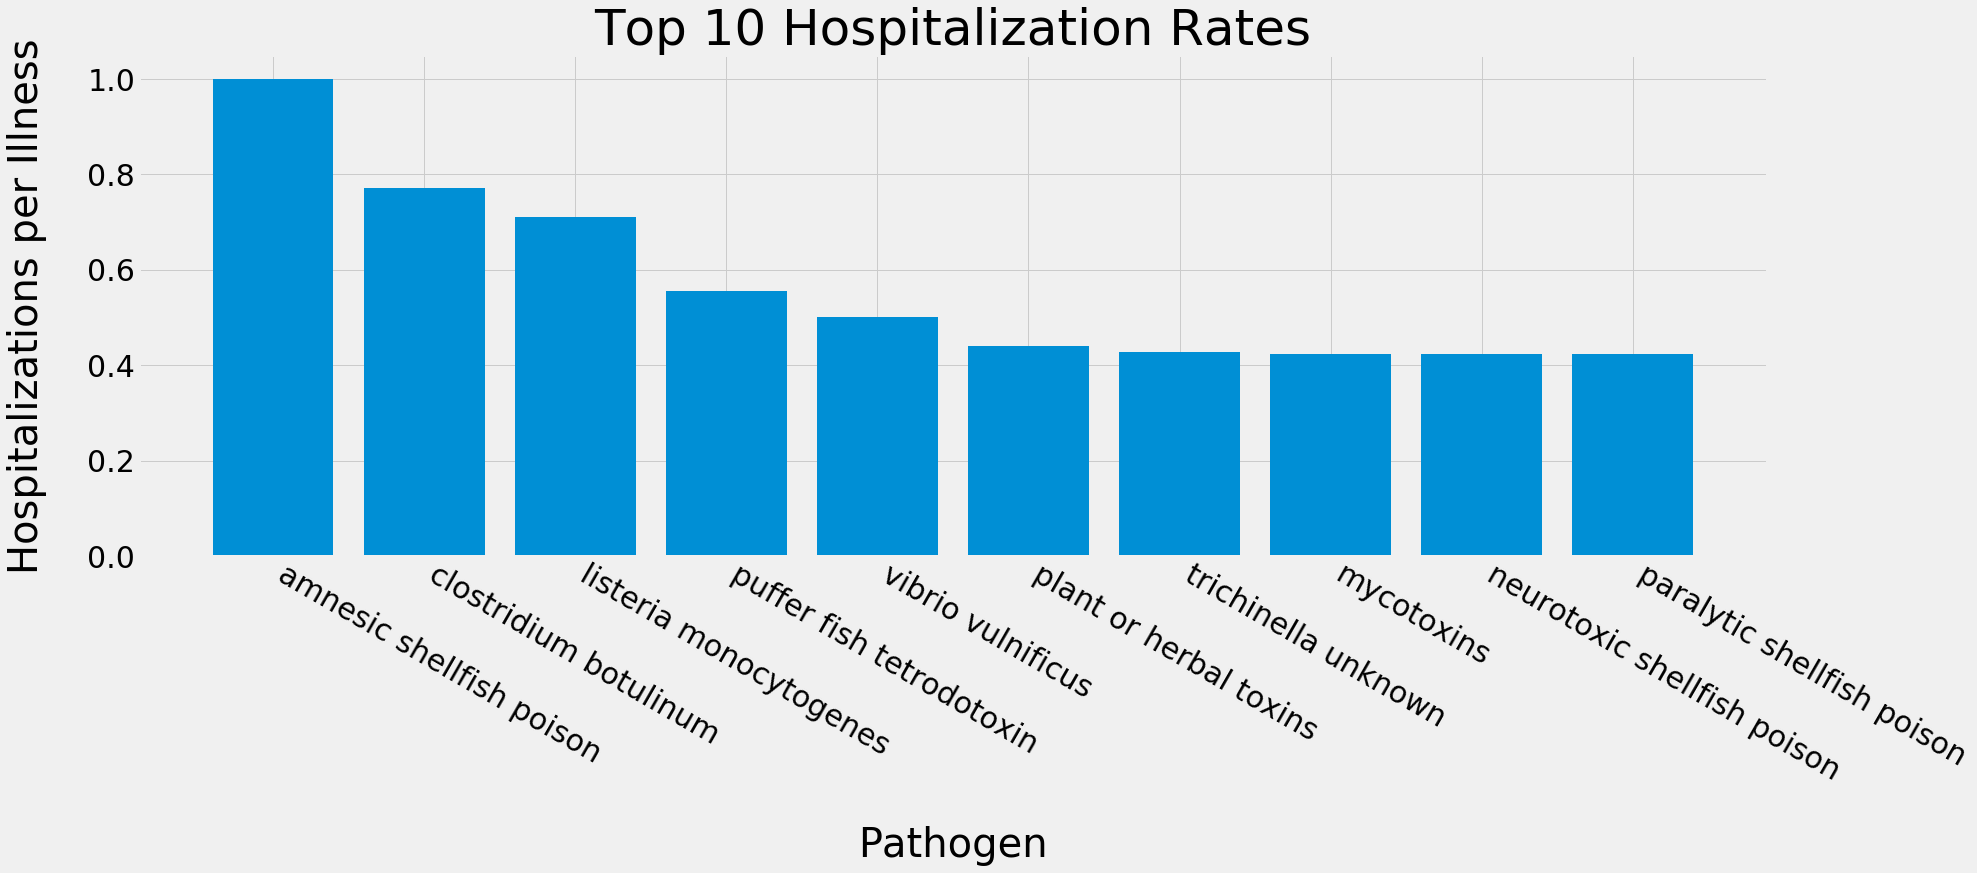

In [37]:
top = top_hospitalizations_per_illness

fig,ax = plt.subplots(figsize=(26,12))
ax.bar(top[:10].index,top[:10])
ax.set_xlabel('Pathogen', labelpad = 40, fontsize=40)
ax.set_ylabel('Hospitalizations per Illness', fontsize=40, labelpad = 40)
ax.set_title('Top 10 Hospitalization Rates', fontsize=50)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=.3)
plt.savefig('figures/hospitalizations_per_illness');

In [38]:
# Two cases of vibro vulnificus, one patient was hospitalized and died, the other patient was not hospitalized
# 762 cases of listeria, 541 hospitalizations, 116 deaths

In [39]:
# Extra filter for etiologies with >n illnesses

In [40]:
n = 2
df1 = df.groupby('primary species').sum()
illnesses1 = df1[df1['Illnesses'] > n]['Illnesses']
hospitalizations1 = df1[df1['Illnesses'] > n]['Hospitalizations']
fatalities1 = df1[df1['Illnesses'] > n]['Fatalities']

In [41]:
fatalities_per_illness1 = fatalities1 / illnesses1
top_fatalities_per_illness1 = fatalities_per_illness1.sort_values(ascending=False)

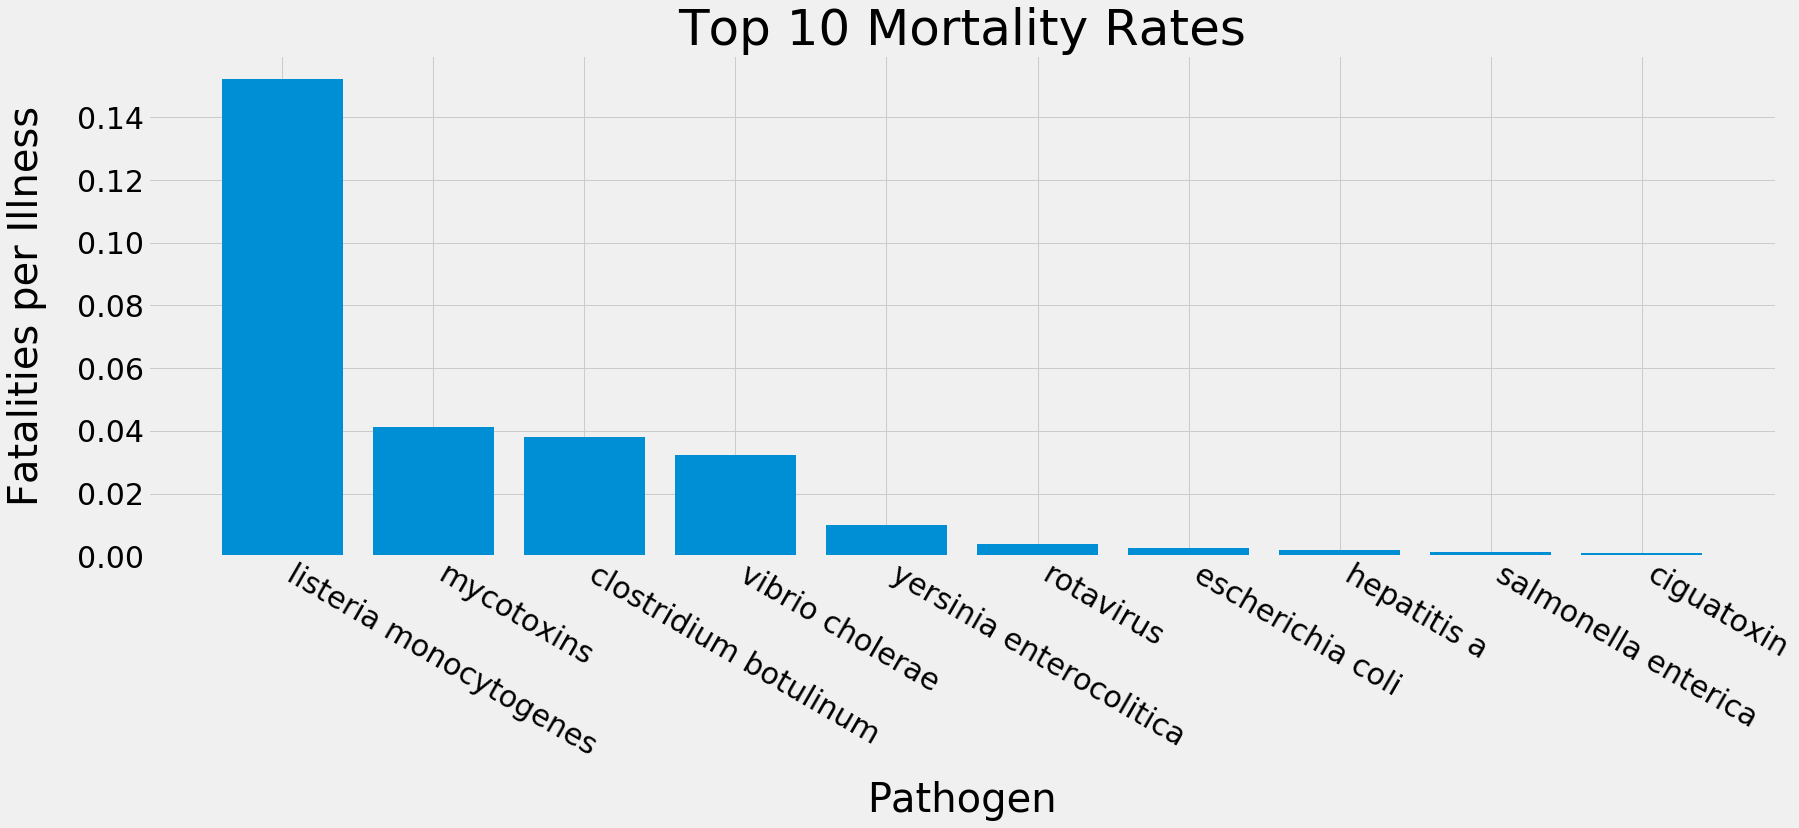

In [42]:
top = top_fatalities_per_illness1

fig,ax = plt.subplots(figsize=(26,12))
ax.bar(top[:10].index,top[:10])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=40)
ax.set_ylabel('Fatalities per Illness', fontsize=40, labelpad = 30)
ax.set_title('Top 10 Mortality Rates', fontsize=50)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=0.30)
plt.savefig('figures/mortality_per_illness');

In [43]:
fatalities_per_hospitalization1 = fatalities1 / hospitalizations1
top_fatalities_per_hospitalization1 = fatalities_per_hospitalization1.sort_values(ascending=False)

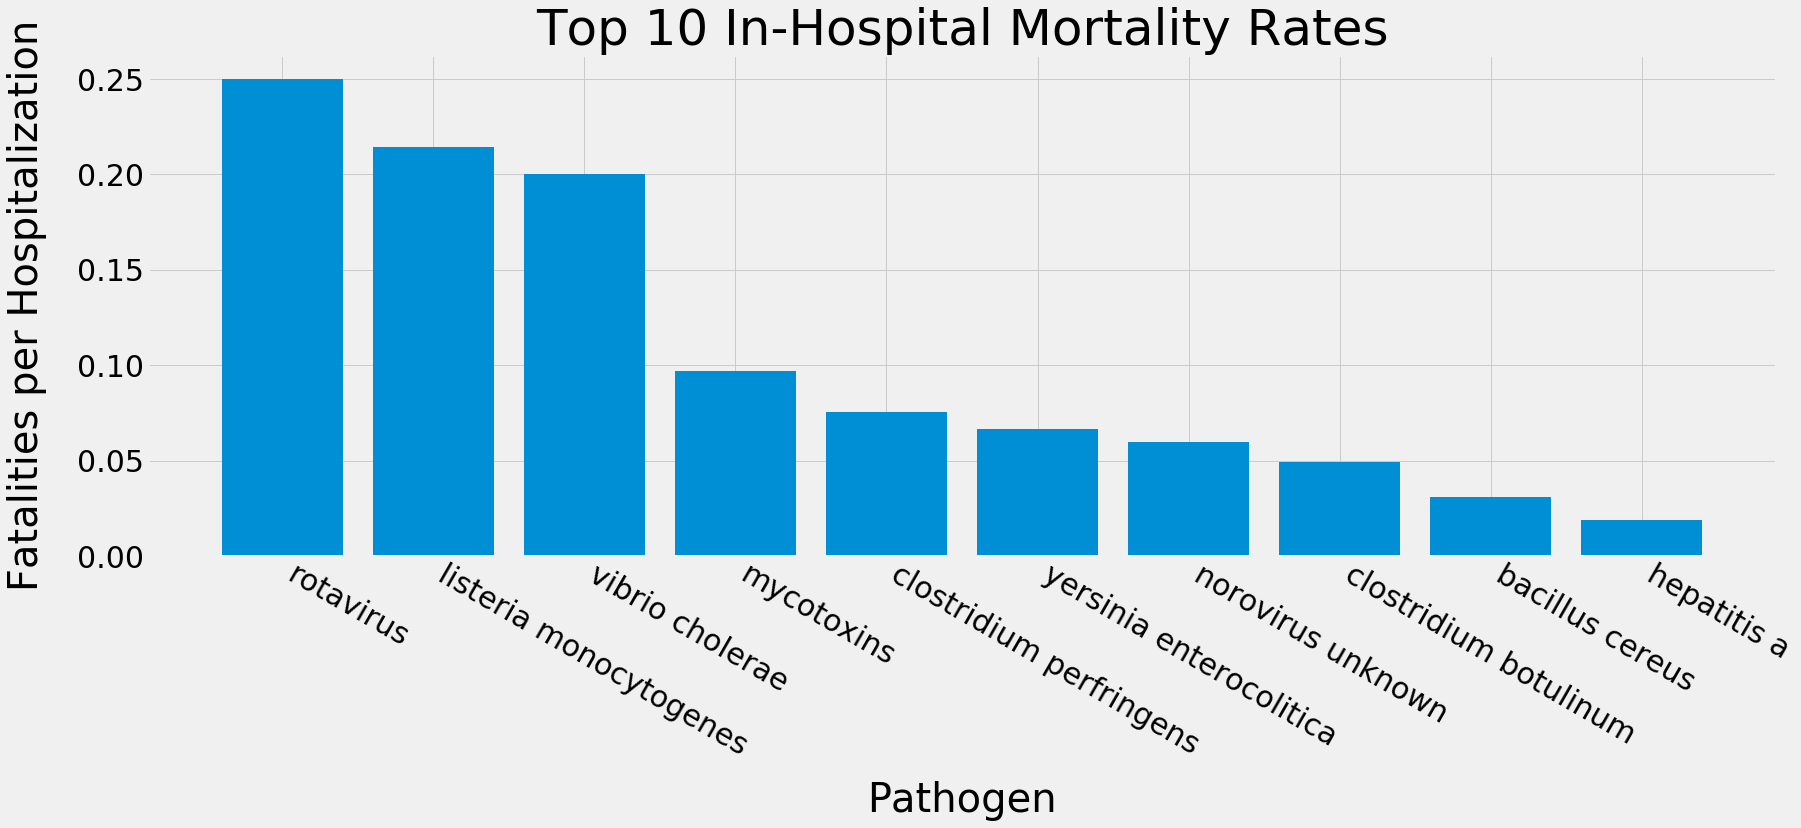

In [44]:
top = top_fatalities_per_hospitalization1

fig,ax = plt.subplots(figsize=(26,12))
ax.bar(top[:10].index,top[:10])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=40)
ax.set_ylabel('Fatalities per Hospitalization', fontsize=40, labelpad = 30)
ax.set_title('Top 10 In-Hospital Mortality Rates', fontsize=50)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=0.30)
plt.savefig('figures/mortality_per_hospitalization');

In [45]:
# Fatalities per illness and fatalities per hospitalization among top 10 etiologies leading to hospitalization

In [46]:
fatalities_illness_hospital = fatalities_per_illness[top_hospitalizations.index[:10]]
fatalities_hospital_hospital = fatalities_per_hospitalization[top_hospitalizations.index[:10]]

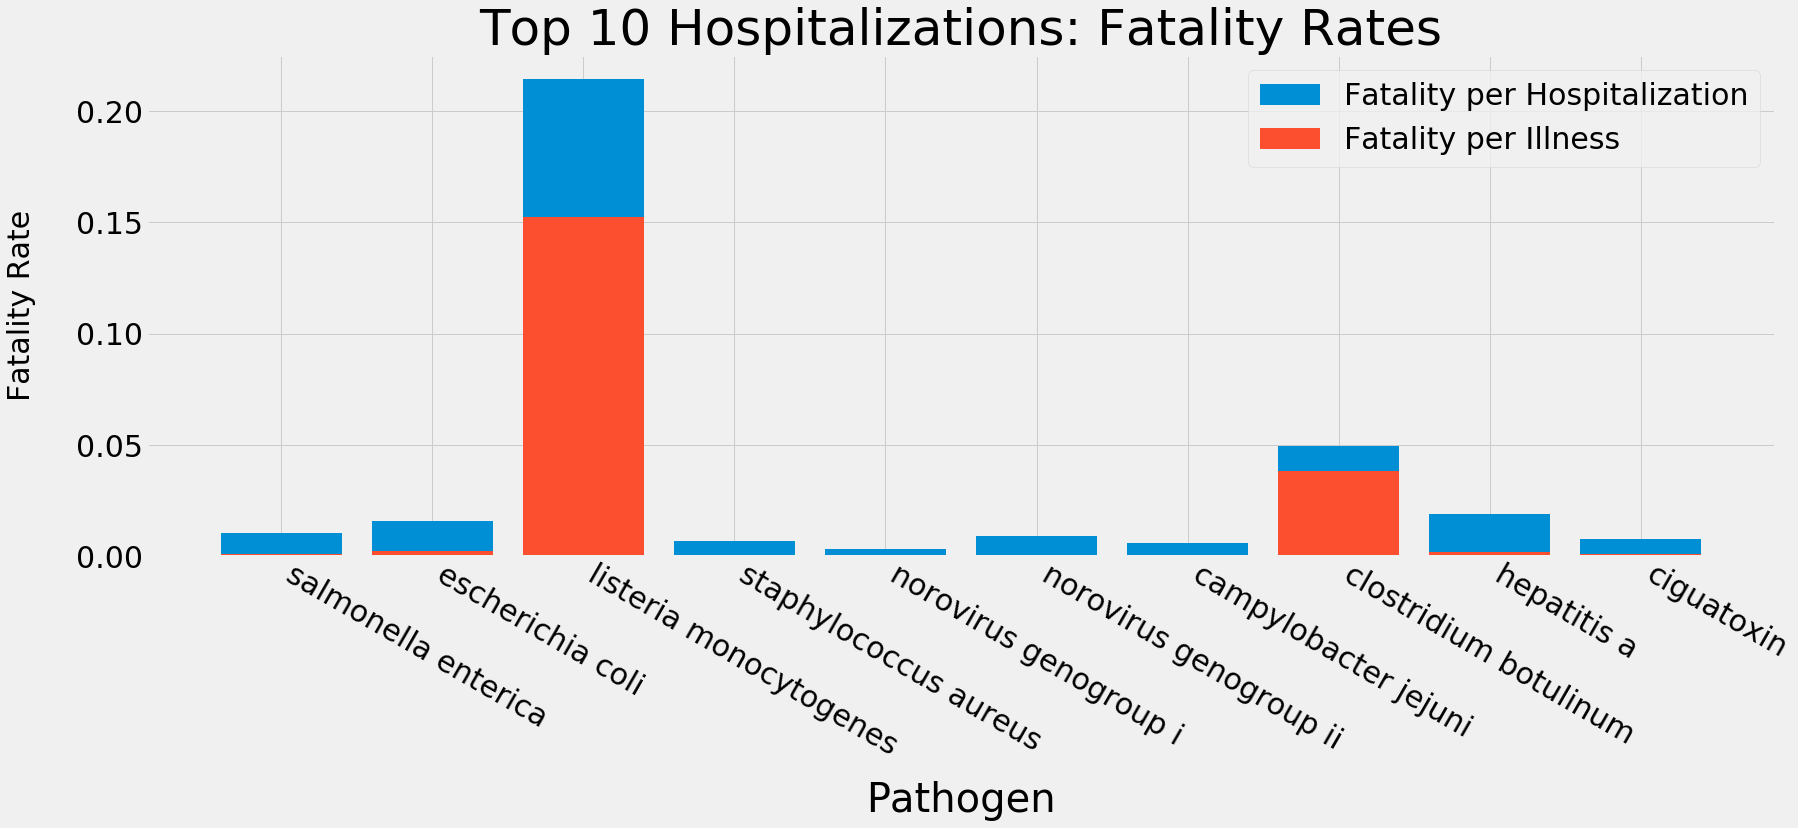

In [47]:
top = fatalities_illness_hospital

fig,ax = plt.subplots(figsize=(26, 12))
ax.bar(fatalities_hospital_hospital[:10].index,fatalities_hospital_hospital[:10], label='Fatality per Hospitalization')
ax.bar(fatalities_illness_hospital[:10].index,fatalities_illness_hospital[:10], label='Fatality per Illness')
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=40)
ax.set_ylabel('Fatality Rate', fontsize=30, labelpad = 40)
ax.set_title('Top 10 Hospitalizations: Fatality Rates', fontsize=50)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.gcf().subplots_adjust(bottom=0.30)
plt.legend(fontsize=30)
plt.savefig('figures/fatality_rates_among_hospitalized')
plt.tight_layout;

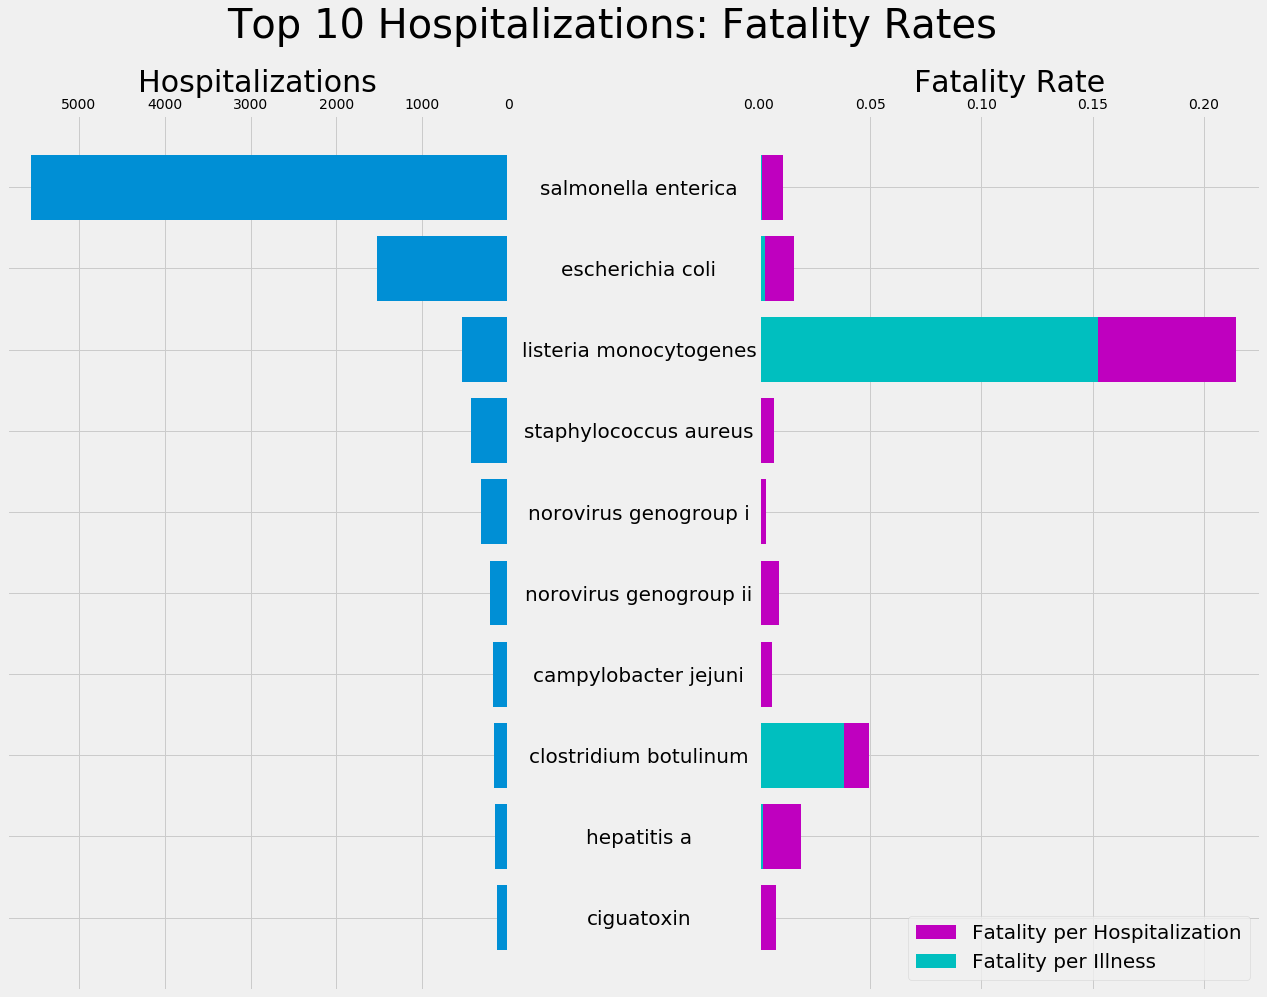

In [48]:
fig, axs = plt.subplots(1,2, figsize=(20,15))
axs[0].barh(top_hospitalizations[:10][::-1].index,top_hospitalizations[:10][::-1])
axs[0].set_title('Hospitalizations', fontsize=30)

axs[0].invert_xaxis()
axs[0].yaxis.set_label_position("right")
axs[0].set_yticklabels([])
axs[0].tick_params(axis='x', labeltop=True, labelbottom=False)

axs[1].barh(fatalities_hospital_hospital[:10][::-1].index,fatalities_hospital_hospital[:10][::-1], label='Fatality per Hospitalization', color='m')
axs[1].barh(fatalities_illness_hospital[:10][::-1].index,fatalities_illness_hospital[:10][::-1], label='Fatality per Illness', color='c')
axs[1].set_title('Fatality Rate', fontsize=30)
axs[1].tick_params(axis='y', which='major', pad=120)
axs[1].tick_params(axis='x', labeltop=True, labelbottom=False)

plt.suptitle('Top 10 Hospitalizations: Fatality Rates', fontsize=40)
plt.style.use('fivethirtyeight')
plt.yticks(fontsize=20, horizontalalignment='center')
plt.subplots_adjust(wspace=0.5)
plt.legend(fontsize=20, loc=4, bbox_to_anchor=(0,0,1,1))
plt.tight_layout

plt.savefig('figures/top_hospitalizations_fatality_rates');